<a href="https://colab.research.google.com/github/deepthidornala/Netflix-EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data set**

# **Key Details:**
**Total Entries: The dataset contains 8,809 entries, each representing a unique movie or TV show.**


---


**Columns: There are 12 columns in the dataset:**
* show_id: A unique identifier for each title.
* type: The category of the title, which is either 'Movie' or 'TV Show'.
* title: The name of the movie or TV show.
* director: The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)
* cast: The list of main actors/actresses in the title. (Some entries might not have this information.)
* country: The country or countries where the movie or TV show was produced.
* date_added: The date the title was added to Netflix.
* release_year: The year the movie or TV show was originally released.
* rating: The age rating of the title.
duration: The duration of the title, in minutes for movies and seasons for TV shows.
* listed_in: The genres the title falls under.
* description: A brief summary of the title.




#Importing File

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
      print(os.path.join(dirname,filename))

# Library call

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as  plt
import seaborn as sns
import plotly.express as ply

# Data preparation

In [ ]:
netflix=pd.read_csv('/content/netflix_titles.csv',encoding='Latin')

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
#Resizing the dataset
netflix=netflix.iloc[:,:12]

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.shape

(8809, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#filling null values
netflix.director = netflix.director.fillna("No name")
netflix.cast   = netflix.cast.fillna("No cast")
netflix.country = netflix.country.fillna("No country")
netflix.date_added = netflix.date_added.fillna("No date")
netflix.rating = netflix.rating.fillna("No rating")
netflix.duration = netflix.duration.fillna("No duration")

In [ ]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No name,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No name,No cast,No country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No name,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Type analysis

In [ ]:
movie_tv = netflix.groupby('type').size().reset_index(name='count')
movie_tv

,type,count
0,Movie,6132
1,TV Show,2677


In [ ]:
ply.pie(movie_tv,names='type',values='count',title='No.of Movies and TV Shows')

 analysis

In [ ]:
content = netflix.groupby('rating').size().reset_index(name='count').nlargest(10,'count')
content

,rating,count
13,TV-MA,3208
11,TV-14,2160
14,TV-PG,863
10,R,799
9,PG-13,490
16,TV-Y7,334
15,TV-Y,307
8,PG,287
12,TV-G,220
6,NR,80


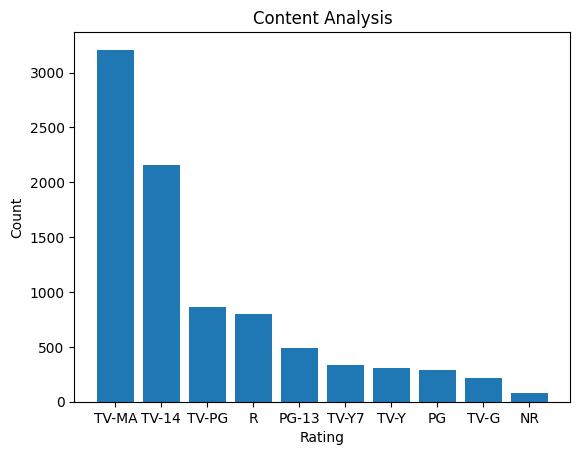

In [ ]:
plt.bar(content['rating'],content['count'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Content Analysis')
plt.show()

In [ ]:
ply.bar(content,x='rating',y='count',text_auto=True,title='Content Analysis')

Top director

In [ ]:
director=netflix['director'].str.split(',',expand=True).stack()
director = pd.DataFrame(director,columns = ['Director'])
director=netflix.groupby('director').size().reset_index(name='count').nlargest(15,'count')
director

,director,count
3051,No name,2634
3393,Rajiv Chilaka,19
3444,"RaÃºl Campos, Jan Suter",18
2598,Marcus Raboy,16
4047,Suhas Kadav,16
1790,Jay Karas,14
685,Cathy Garcia-Molina,13
1787,Jay Chapman,12
2671,Martin Scorsese,12
4482,Youssef Chahine,12


In [ ]:
director = director[director['director'] != 'No name']
director

,director,count
3393,Rajiv Chilaka,19
3444,"RaÃºl Campos, Jan Suter",18
2598,Marcus Raboy,16
4047,Suhas Kadav,16
1790,Jay Karas,14
685,Cathy Garcia-Molina,13
1787,Jay Chapman,12
2671,Martin Scorsese,12
4482,Youssef Chahine,12
4021,Steven Spielberg,11


In [ ]:
ply.bar(director,x='director',y='count',text_auto=True,title='Top Director')

Top Cast

In [ ]:
casting_individual = netflix['cast'].str.split(',',expand=True).stack().reset_index(drop=True)
casting_individual

0                           No cast
1                        Ama Qamata
2                       Khosi Ngema
3                     Gail Mabalane
4                    Thabang Molaba
                    ...            
64985             Ji?í Maria Sieber
64986                Raymond Waring
64987                   Petr Drozda
64988                    John Comer
64989     Benedetta Degli Innocenti
Length: 64990, dtype: object

In [ ]:
casting_individual = pd.DataFrame(casting_individual,columns = ['TotalCast'])
casting_individual.head()

,TotalCast
0,No cast
1,Ama Qamata
2,Khosi Ngema
3,Gail Mabalane
4,Thabang Molaba


In [ ]:
top_15=casting_individual.groupby('TotalCast').size().reset_index(name='count').nlargest(15,'count')
top_15

,TotalCast,count
37675,No cast,825
2612,Anupam Kher,39
26965,Rupa Bhimani,31
30327,Takahiro Sakurai,30
15555,Julie Tejwani,28
23642,Om Puri,27
25433,Rajesh Kava,26
38472,Shah Rukh Khan,26
1905,Andrea Libman,25
4190,Boman Irani,25


In [ ]:
top_15 = top_15.iloc[1:,:]
top_15

,TotalCast,count
2612,Anupam Kher,39
26965,Rupa Bhimani,31
30327,Takahiro Sakurai,30
15555,Julie Tejwani,28
23642,Om Puri,27
25433,Rajesh Kava,26
38472,Shah Rukh Khan,26
1905,Andrea Libman,25
4190,Boman Irani,25
23974,Paresh Rawal,25


In [ ]:
ply.bar(top_15,x='TotalCast',y='count',text_auto=True,title='Top Cast')

genres analysis

In [ ]:
listed_in = netflix['listed_in'].str.split(',',expand=True).stack().reset_index(drop=True)
listed_in = pd.DataFrame(listed_in,columns=['Genres'])
listed_in.head()

,Genres
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows


In [ ]:
top_15=listed_in.groupby('Genres').size().reset_index(name='count').nlargest(15,'count')
top_15

,Genres,count
15,International Movies,2624
54,Dramas,1600
48,Comedies,1210
41,Action & Adventure,859
51,Documentaries,829
10,Dramas,827
58,International TV Shows,774
14,Independent Movies,736
33,TV Dramas,696
23,Romantic Movies,613


In [ ]:
ply.bar(top_15,x='Genres',y='count',text_auto=True,title='Top Genres')

type vs country

In [ ]:
content = netflix.groupby(['type','country']).size().reset_index(name='count').nlargest(16,'count')
content

,type,country,count
526,Movie,United States,2059
218,Movie,India,893
813,TV Show,United States,760
321,Movie,No country,440
754,TV Show,No country,391
793,TV Show,United Kingdom,213
441,Movie,United Kingdom,206
735,TV Show,Japan,169
773,TV Show,South Korea,159
50,Movie,Canada,122


In [ ]:
content = content[content['country'] != 'No country']
content

,type,country,count
526,Movie,United States,2059
218,Movie,India,893
813,TV Show,United States,760
793,TV Show,United Kingdom,213
441,Movie,United Kingdom,206
735,TV Show,Japan,169
773,TV Show,South Korea,159
50,Movie,Canada,122
385,Movie,Spain,97
128,Movie,Egypt,92


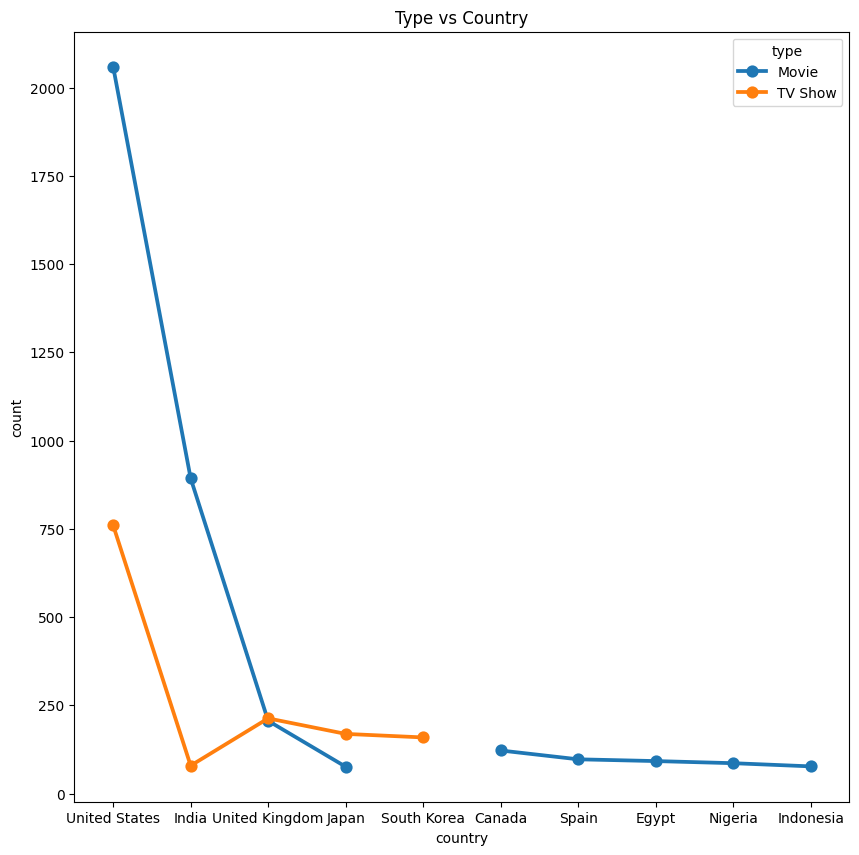

In [ ]:
plt.figure(figsize=(10,10))
sns.pointplot(x='country',y='count',hue='type',data=content)
plt.title('Type vs Country')
plt.show()

Type vs release year

In [ ]:
type_year=netflix.groupby(['type','release_year']).size().reset_index(name='count')
type_year = type_year[type_year['release_year'] > 2008 ]
type_year.head()

,type,release_year,count
60,Movie,2009,118
61,Movie,2010,154
62,Movie,2011,145
63,Movie,2012,173
64,Movie,2013,225


In [ ]:
ply.line(type_year,x='release_year',y='count',color='type',title='Type vs Release Year')